In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [3]:
def set_d(city):
    data = pd.read_excel("data.xlsx", sheet_name=f'{city}_Homelessness')
    data_points = data.Proportion
    f = []
    for i in range(3):
        fig = plt.figure(figsize=(20,8))
        f.append(fig)
    for i in range(3):
        ax1 = f[i].add_subplot(131)
        ax1.set_title("Original")
        ax1.plot(data_points)

        ax2 = f[i].add_subplot(132)
        plot_acf(data_points.dropna(), ax=ax2)

        ax3 = f[i].add_subplot(133)
        plot_pacf(data_points.dropna(), ax=ax3)

        data_points = data_points.diff()
    
    plt.show()

    result = adfuller(data.Proportion.dropna())
    print('p-value: ', result[1])
    result = adfuller(data.Proportion.diff().dropna())
    print('p-value: ', result[1])
    result = adfuller(data.Proportion.diff().diff().dropna())
    print('p-value: ', result[1])
    result = adfuller(data.Proportion.diff().diff().diff().dropna())
    print('p-value: ', result[1])


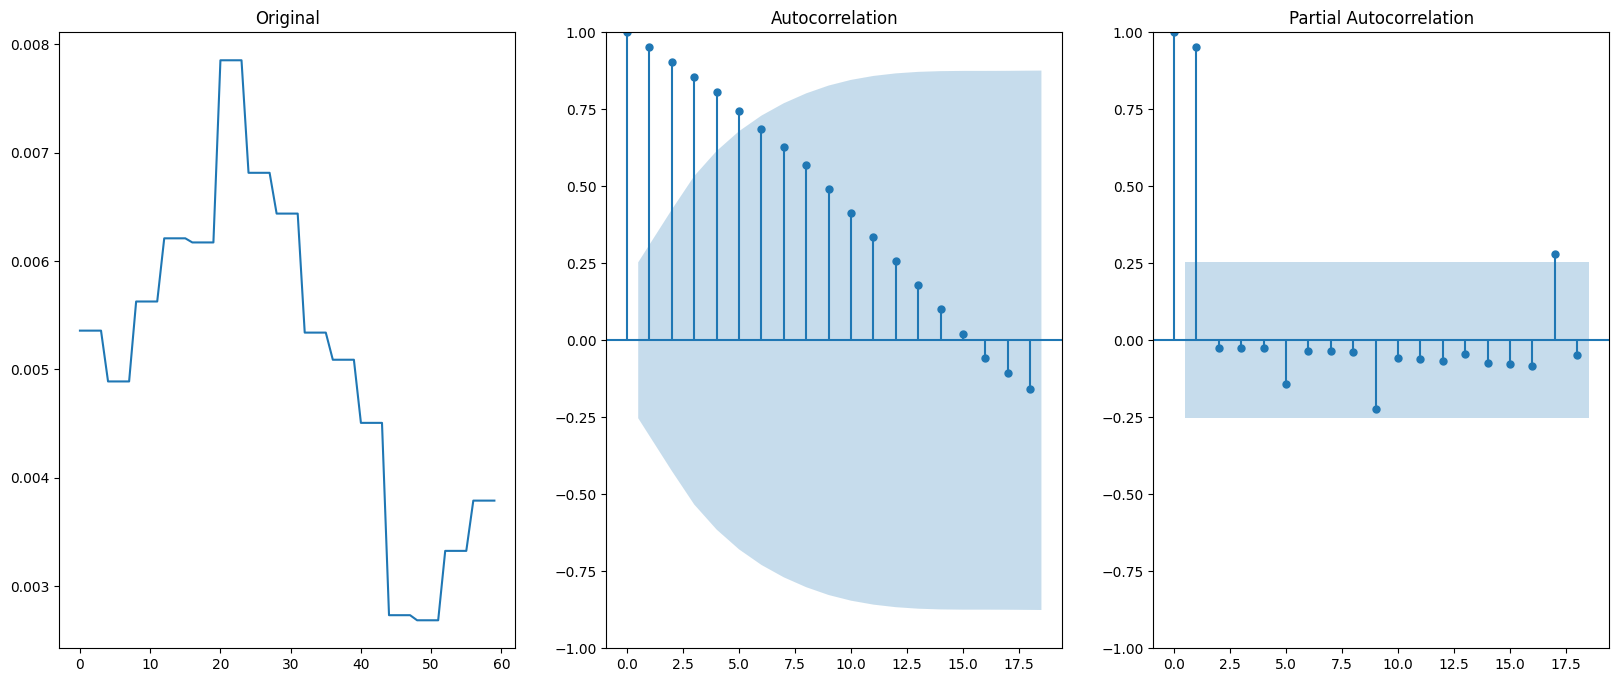

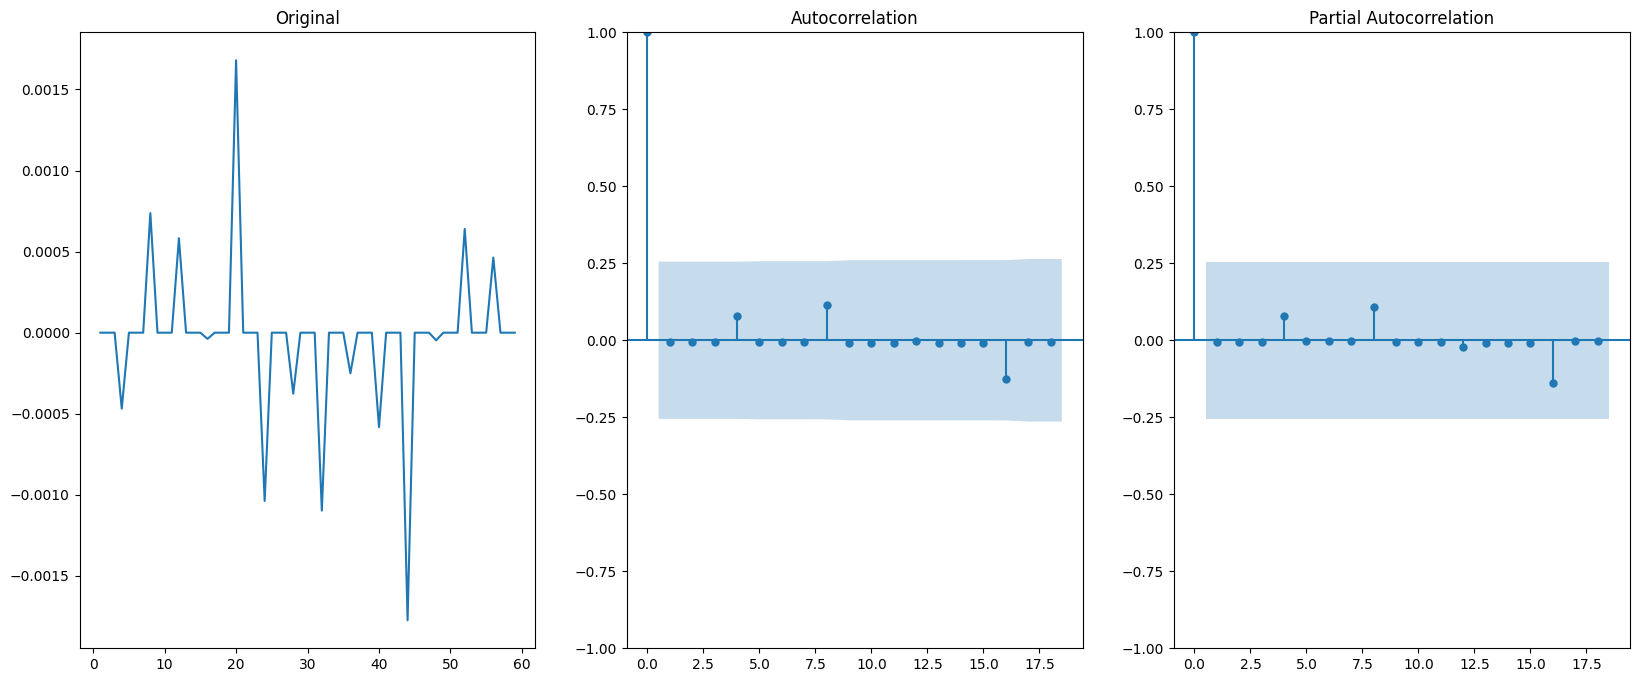

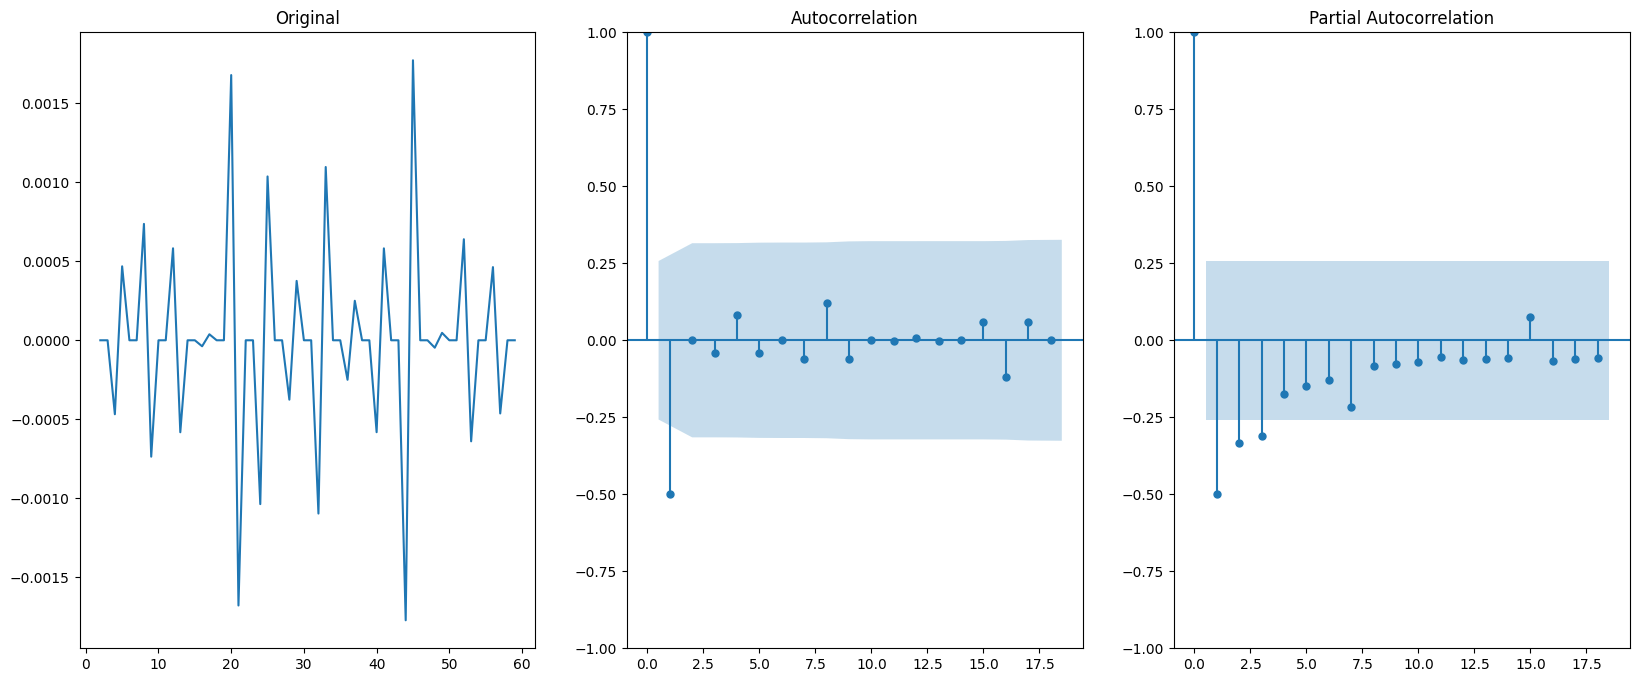

p-value:  0.7823253892519373
p-value:  3.9555968154156e-11
p-value:  1.3223968087502004e-11
p-value:  7.642126820843782e-06


In [4]:
set_d('Brighton')

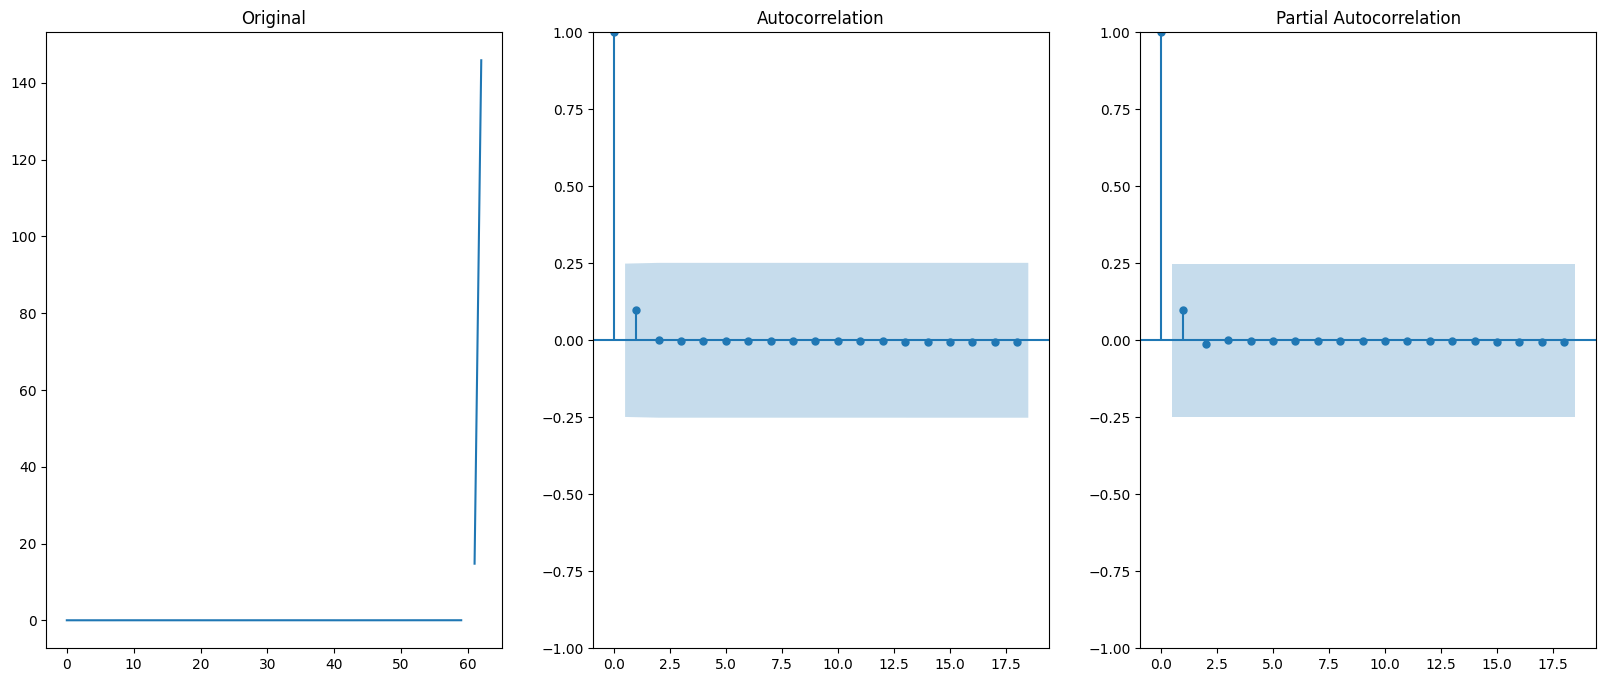

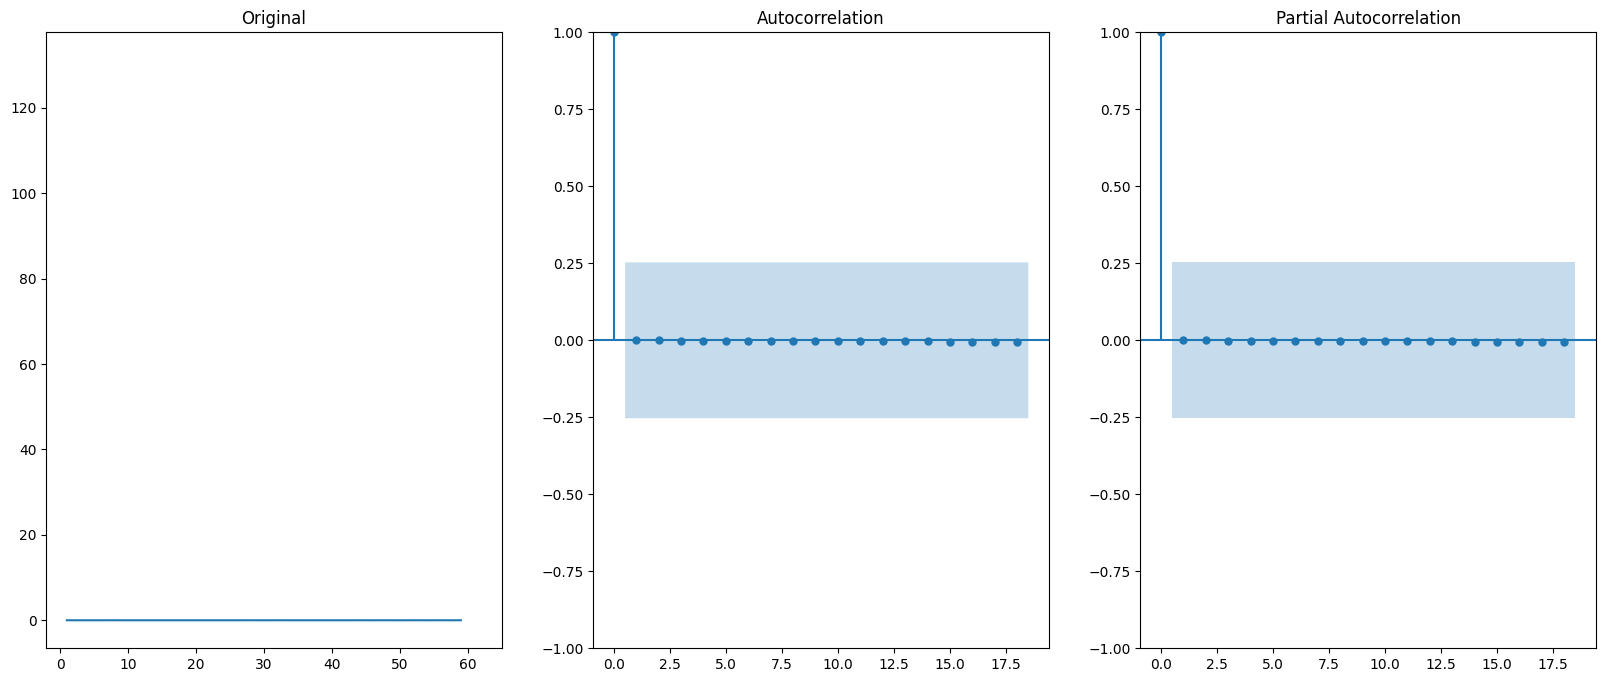

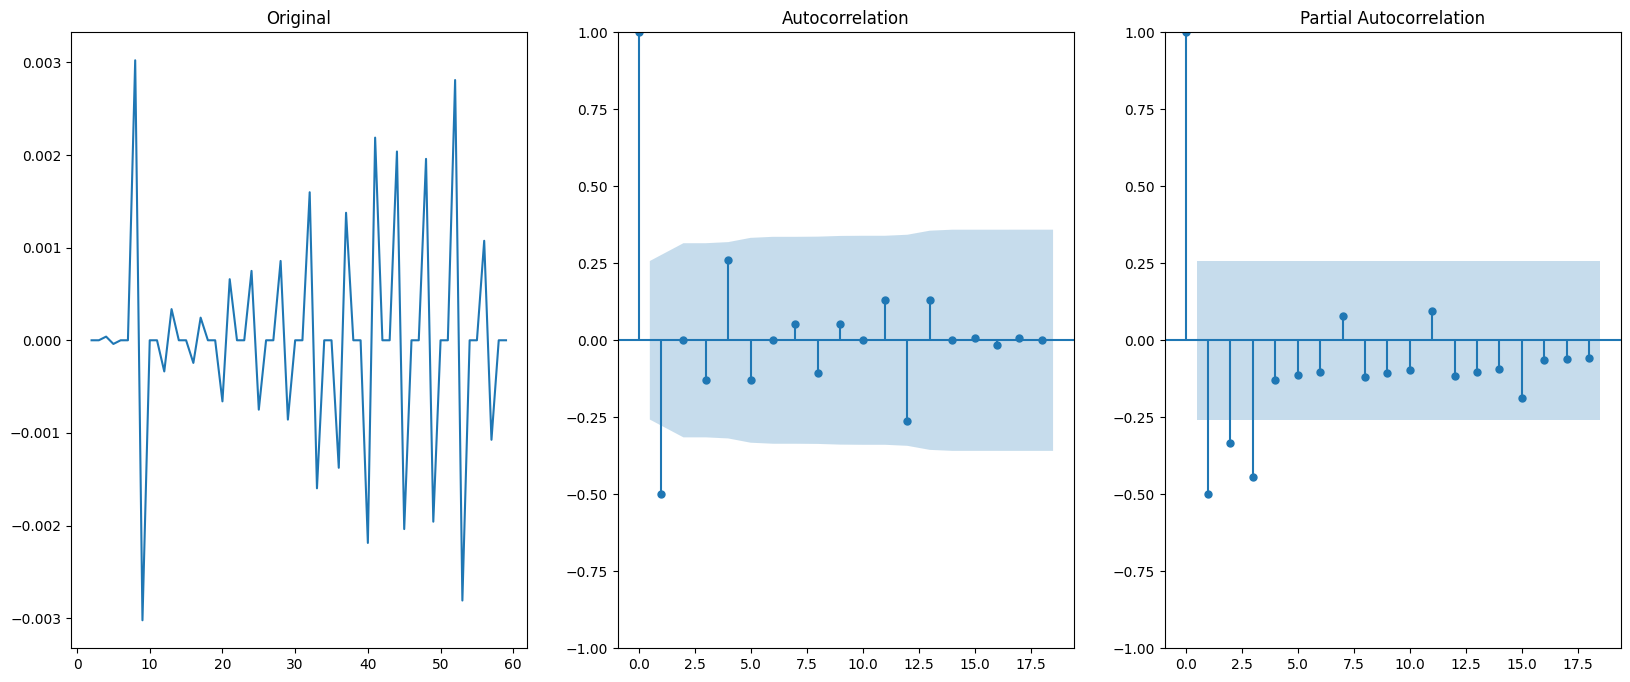

p-value:  0.9990589330875168
p-value:  0.9383034126528246
p-value:  8.26336954812411e-15
p-value:  9.772527455255242e-12


In [5]:
set_d('Manchester')

Brighton: p = 1, d = 1, q = 2
Manchester: p = 1, d = 3, q = 1

In [28]:
def predict_proportion(city):
    df = pd.read_excel("data.xlsx", sheet_name=f'{city}_Homelessness', usecols = ['Year','Proportion'])
        
    if (city == 'Brighton'):
        p=1
        d=1
        q=6
    elif (city=='Manchester'):
        p=1
        d=2
        q=2

    # Fit an ARIMA model
    order = (p, d, q)  # Example order, you can adjust this based on model diagnostics
    arima_model = ARIMA(df['Proportion'], order=order)
    arima_result = arima_model.fit()

    # Generate forecasts
    forecast_steps = 50  # Example: forecasting 5 steps ahead
    forecast = arima_result.forecast(steps=forecast_steps)

    # Plot the data and forecasts
    plt.plot(df['Year'], df['Proportion'], label='Actual Data')
    plt.plot(range(2023, 2023 + forecast_steps), forecast, label='Forecast', color='red')
    plt.xlabel('Year')
    plt.ylabel('Proportion of Households that are Homeless')
    plt.title('ARIMA Forecast')
    plt.legend()
    plt.show()

In [30]:
def predict_number(city):
    df = pd.read_excel("data.xlsx", sheet_name=f'{city}_Homelessness', usecols = ['Year','Number'])
        
    if (city == 'Brighton'):
        p=1
        d=1
        q=6
    elif (city=='Manchester'):
        p=1
        d=1
        q=1

    # Fit an ARIMA model
    order = (p, d, q)  # Example order, you can adjust this based on model diagnostics
    arima_model = ARIMA(df['Number'], order=order)
    arima_result = arima_model.fit()

    # Generate forecasts
    forecast_steps = 50  # Example: forecasting 5 steps ahead
    forecast = arima_result.forecast(steps=forecast_steps)

    # Plot the data and forecasts
    plt.plot(df['Year'], df['Number'], label='Actual Data')
    plt.plot(range(2023, 2023 + forecast_steps), forecast, label='Forecast', color='red')
    plt.xlabel('Year')
    plt.ylabel('Number of Households that are Homeless')
    plt.title('ARIMA Forecast')
    plt.legend()
    plt.show()

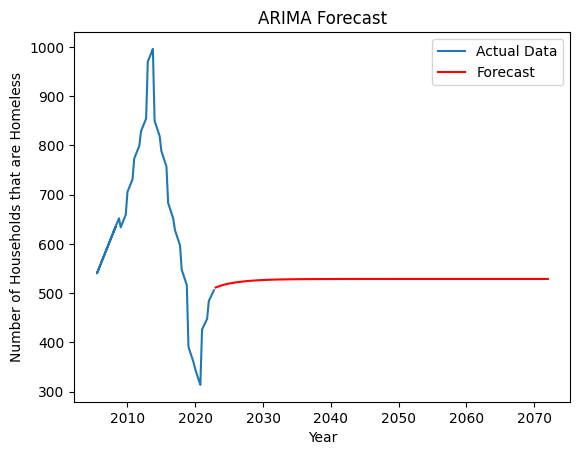

In [34]:
predict_number('Brighton')

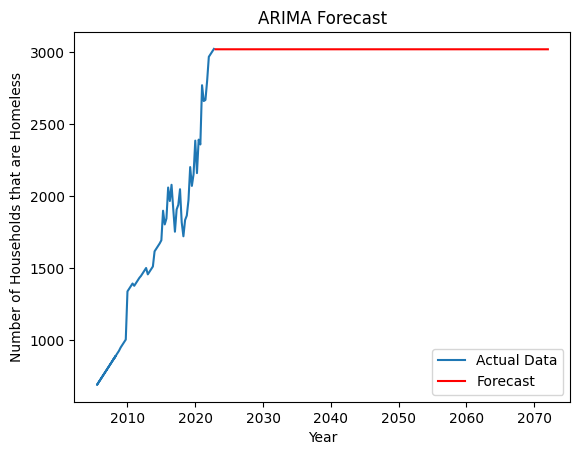

In [35]:
predict_number('Manchester')